In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro, f_oneway, kruskal


In [2]:
from google.colab import files
uploaded = files.upload()

Saving WineQT (1).csv to WineQT (1).csv


In [3]:
wine_df= pd.read_csv("WineQT (1).csv")

In [4]:
# Select relevant columns and filter for quality 5, 6, 7
wine_df = wine_df[['alcohol', 'quality']].dropna()
wine_df = wine_df[wine_df['quality'].isin([5, 6, 7])]

# Check data shape
wine_df.shape

(1088, 2)

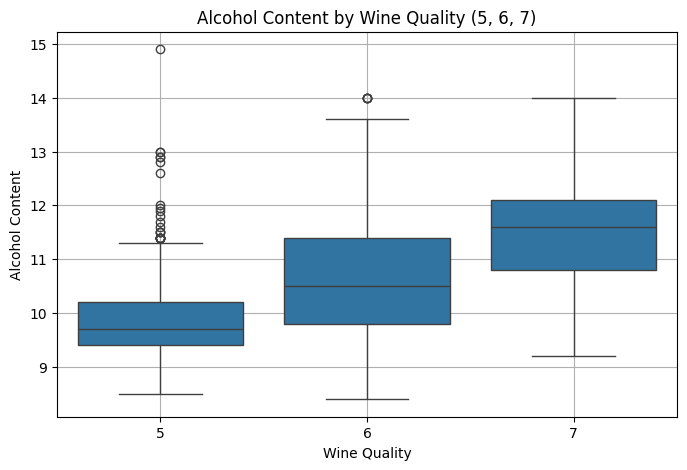

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality', y='alcohol', data=wine_df)
plt.title("Alcohol Content by Wine Quality (5, 6, 7)")
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol Content")
plt.grid(True)
plt.show()


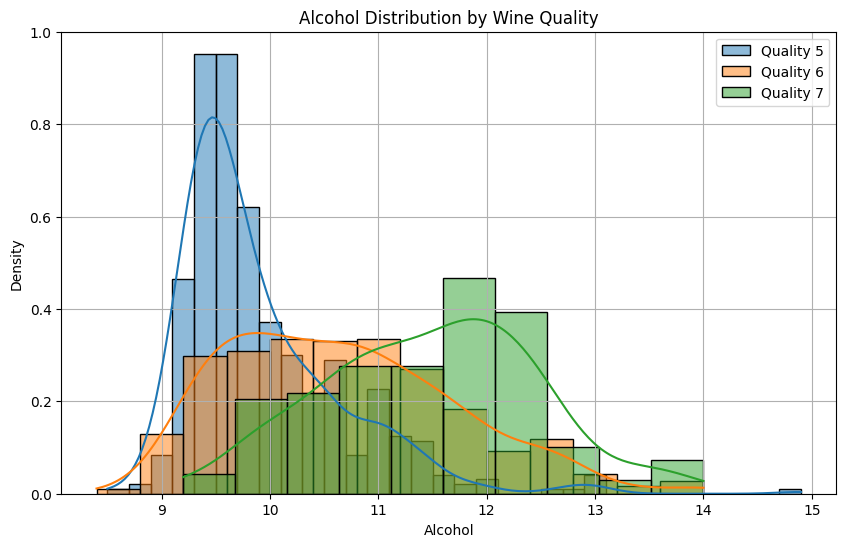

In [6]:
plt.figure(figsize=(10, 6))
for q in [5, 6, 7]:
    sns.histplot(wine_df[wine_df['quality'] == q]['alcohol'],
                 kde=True, stat='density', label=f"Quality {q}")
plt.title("Alcohol Distribution by Wine Quality")
plt.xlabel("Alcohol")
plt.legend()
plt.grid(True)
plt.show()


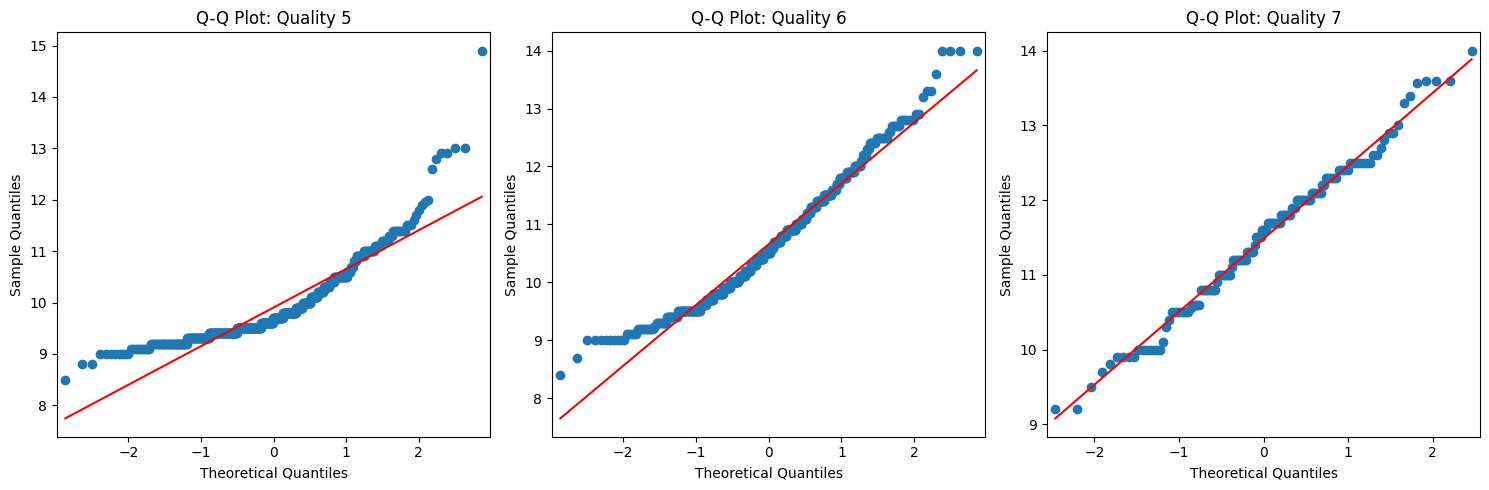

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, q in enumerate([5, 6, 7]):
    sm.qqplot(wine_df[wine_df['quality'] == q]['alcohol'], line='s', ax=axs[i])
    axs[i].set_title(f"Q-Q Plot: Quality {q}")
plt.tight_layout()
plt.show()


In [8]:
# Run Shapiro-Wilk test for each group
shapiro_results = {}
for q in [5, 6, 7]:
    stat, p = shapiro(wine_df[wine_df['quality'] == q]['alcohol'])
    shapiro_results[q] = {'W-statistic': round(stat, 4), 'p-value': round(p, 4)}

# Display results
for q in shapiro_results:
    print(f"Quality {q} - W: {shapiro_results[q]['W-statistic']}, p-value: {shapiro_results[q]['p-value']}")


Quality 5 - W: 0.8399, p-value: 0.0
Quality 6 - W: 0.9671, p-value: 0.0
Quality 7 - W: 0.9884, p-value: 0.2775


# Markdown cell in notebook:

### Hypotheses:
- H₀: The median alcohol content is the same for wines rated 5, 6, and 7.
- H₁: At least one wine quality group has a different median alcohol content.


In [9]:
# Group alcohol values by quality
alcohol_5 = wine_df[wine_df['quality'] == 5]['alcohol']
alcohol_6 = wine_df[wine_df['quality'] == 6]['alcohol']
alcohol_7 = wine_df[wine_df['quality'] == 7]['alcohol']

# Check if all groups are normal
if all(p['p-value'] > 0.05 for p in shapiro_results.values()):
    print("✅ Using One-Way ANOVA")
    test_stat, p_value = f_oneway(alcohol_5, alcohol_6, alcohol_7)
    test_used = "One-Way ANOVA"
else:
    print("✅ Using Kruskal-Wallis Test")
    test_stat, p_value = kruskal(alcohol_5, alcohol_6, alcohol_7)
    test_used = "Kruskal-Wallis Test"

# Show result
print(f"Test Used: {test_used}")
print(f"Test Statistic: {round(test_stat, 4)}")
print(f"p-value: {format(p_value, '.10f')}")


✅ Using Kruskal-Wallis Test
Test Used: Kruskal-Wallis Test
Test Statistic: 284.0973
p-value: 0.0000000000


In [10]:
if p_value < 0.05:
    print("📌 Conclusion: Reject H₀ – There is a significant difference in alcohol content.")
else:
    print("📌 Conclusion: Fail to Reject H₀ – No significant difference found.")


📌 Conclusion: Reject H₀ – There is a significant difference in alcohol content.
